# Petit test pour montrer le partage de code à l'aide de GitHub

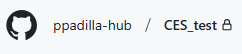

Ceci sont des cellules d'annotations me permettant de mieux commenter mon code et de générer une table de matière automatique en débutant la cellule par "#"

In [12]:
a = 1
b = 2
c = a + b
print(f"{a} + {b} = {c}")
#Ceci est une cellule de code que je peux commenter en ajoutant un "#" au debut d'une ligne

1 + 2 = 3


# Exemple d'analyse

## importation des packages nécessaires

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np

## Génération de données pour l'exemple

In [14]:
pop = np.random.normal(0,0.1,1000) # je genere 1000 individu qui suivent une distribution normale de moyenne 0 et d'écart type 0.1
gender = ['male'] * 500 + ['female'] *500 # on va dire pour l'exemple que la moitié des samples sont des hommes et l'autre des femmes
df = pd.DataFrame({
    'gender': gender,
    'values': pop
}) # et je combine le tout dans un tableau
df.loc[df["gender"] == 'male', 'values'] += 0.25 # une modification observable dans le commit afin d'observer des différences entre les sexes
print(df.head(5)) #j'affiche les 5 première lignes

  gender    values
0   male  0.297029
1   male  0.356942
2   male  0.279938
3   male  0.524169
4   male  0.315748


## Graphiques générés à l'aide de la library seaborn

<Axes: xlabel='values', ylabel='Count'>

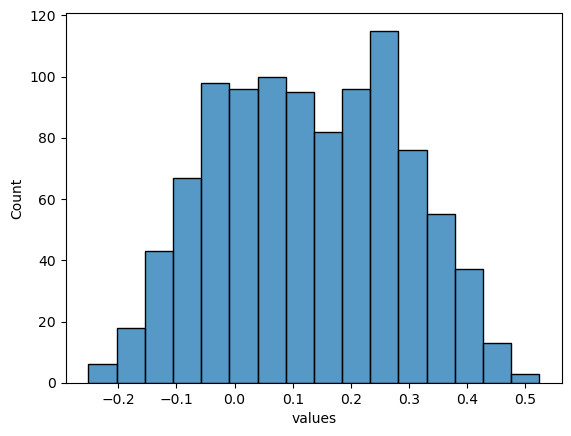

In [15]:
sns.histplot(df['values'])

<Axes: xlabel='gender', ylabel='values'>

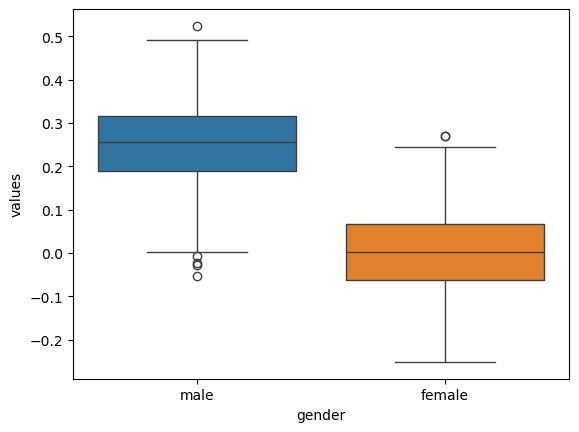

In [16]:
sns.boxplot(data=df, x='gender', y='values', hue='gender')

# Ajout de code ci dessous et de correction dans la génération de donnée afin d'observer les changements dans commit

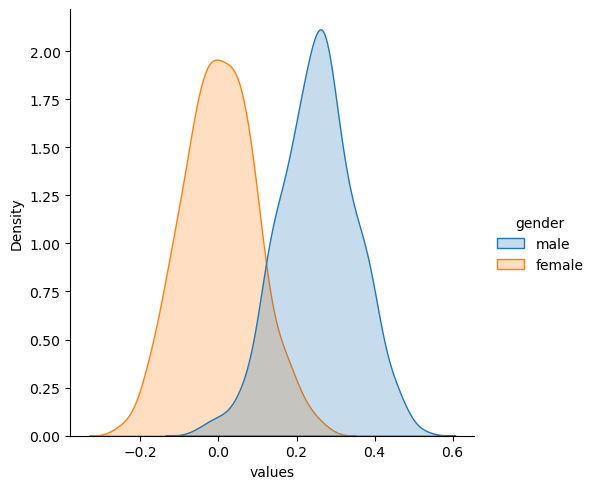

In [17]:
sns.displot(data= df, x='values', hue='gender', kind = 'kde', fill=True)

# Je peux travailler sur le fichier dans ma branche "Pablo", sans toucher au fichier dans la branche principale "main"

In [18]:
df.groupby(by=gender).describe()

values                                                              \
        count      mean       std       min       25%       50%       75%   
female  500.0  0.002187  0.094058 -0.251433 -0.061952  0.002414  0.066069   
male    500.0  0.253010  0.096724 -0.053321  0.189651  0.256201  0.317154   

                  
             max  
female  0.271183  
male    0.524169

In [ ]:
import scipy.stats as stats

male = df[df['gender'] == 'male']['values'] # on groupe les valeurs par sexe
female = df[df['gender'] == 'female']['values']

t_stat, p_val = stats.ttest_ind(male, female) # un test de student (car données ont été généré à l'aide d'une distrib gaussienne)
print(f'Student statistic: {t_stat}, p-value: {p_val}')
# les hommes ont des valeurs significativement différentes des femmes

Student statistic: 41.57065586697997, p-value: 5.3733741589642205e-220
